<a href="https://colab.research.google.com/github/azerrr18/python-projects-for-data-analysis/blob/main/bmw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
bmw = pd.read_csv('bmw.csv')
bmw.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [ ]:
bmw.info()
bmw.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


10781

In [ ]:
bmw.isna().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [ ]:
bmw.duplicated(subset=['model']).sum()

np.int64(10757)

In [ ]:
# Overwrite the old variable or create a new one
bmw_filtered = bmw[(bmw['year'] < 2020) & (bmw['price'] > 20000)]

# Now view the new filtered version
bmw_filtered.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
14,X3,2017,22000,Automatic,19057,Diesel,145,54.3,2.0
31,X4,2017,23000,Automatic,34960,Diesel,150,54.3,2.0
33,1 Series,2017,20500,Automatic,24029,Petrol,145,39.8,3.0
44,5 Series,2017,23500,Automatic,25034,Diesel,200,47.9,3.0


In [ ]:
bmw['price'].mean()

np.float64(22733.408867452)

In [ ]:
group_data = bmw.groupby('model')['price_usd'].agg('mean')
group_data

,price_usd
model,
1 Series,15821.670391
2 Series,19539.371847
3 Series,19880.857962
4 Series,22498.418090
5 Series,22537.428030
6 Series,24354.370370
7 Series,36934.320755
8 Series,63997.794872
M2,43140.333333


In [ ]:
bmw.rename(columns={'price': 'price_usd', 'tax': 'road_tax'}, inplace=True)
bmw

,model,year,price_usd,transmission,mileage,fuelType,road_tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


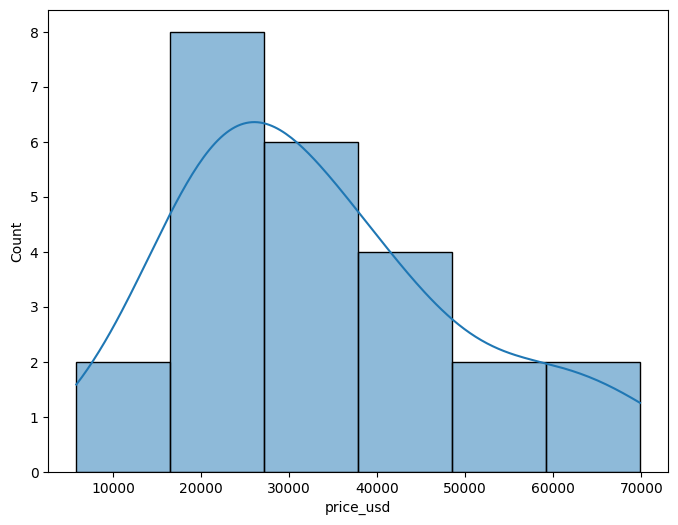

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(x = group_data, kde = True, ax=ax)
plt.show()

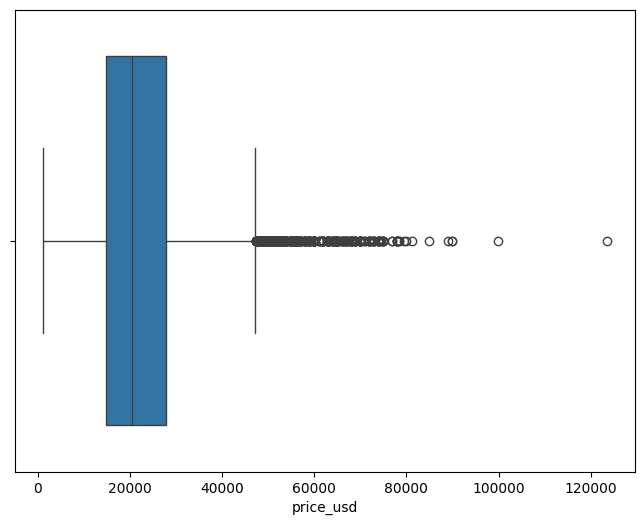

In [ ]:
quartile1 = bmw['price_usd'].quantile(0.25)
quartile2 = bmw['price_usd'].quantile(0.75)
iqr = quartile2 - quartile1
plt.figure(figsize=(8,6))
outliers = sns.boxplot(x='price_usd', data=bmw)
plt.show()

In [ ]:
bmw.loc[0:3]

,model,year,price_usd,transmission,mileage,fuelType,road_tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5


In [ ]:
bmw.iloc[0:3, 1:2]

,year
0,2014
1,2018
2,2016


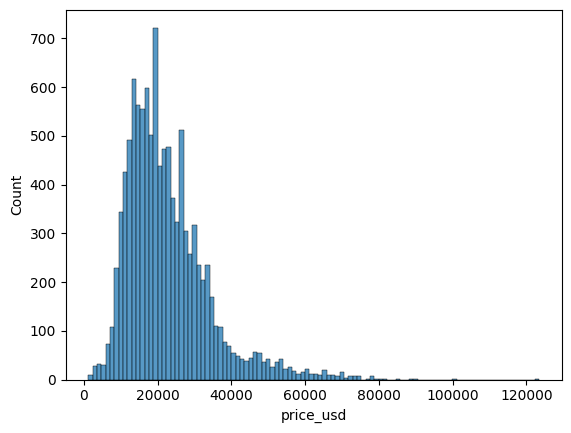

In [ ]:
sns.histplot(x='price_usd', data=bmw)
plt.show()
#

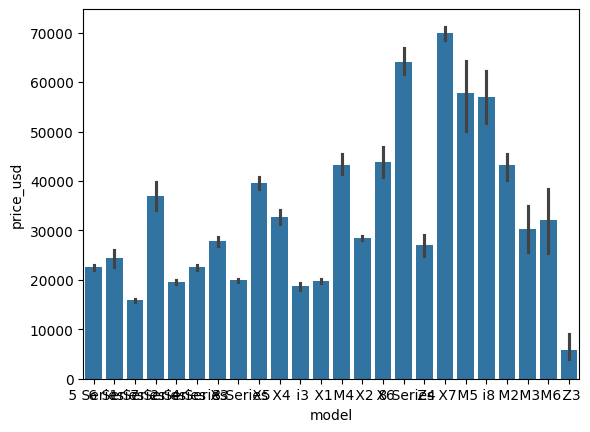

In [ ]:
sns.barplot(x='model', y='price_usd', data=bmw)
plt.show()
#

In [ ]:
average = bmw.groupby('model')['price_usd'].agg('mean')
average.round(2)
#
#

,price_usd
model,
1 Series,15821.67
2 Series,19539.37
3 Series,19880.86
4 Series,22498.42
5 Series,22537.43
6 Series,24354.37
7 Series,36934.32
8 Series,63997.79
M2,43140.33


In [ ]:
bmw[['model', 'price_usd', 'engineSize']]
bmw[bmw['engineSize'] >= 3.0]

,model,year,price_usd,transmission,mileage,fuelType,road_tax,mpg,engineSize
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
29,X3,2015,17400,Automatic,50316,Diesel,200,47.9,3.0
33,1 Series,2017,20500,Automatic,24029,Petrol,145,39.8,3.0
42,X3,2013,12000,Automatic,79972,Diesel,200,47.1,3.0
...,...,...,...,...,...,...,...,...,...
10744,X5,2015,21500,Automatic,80600,Diesel,200,47.1,3.0
10750,2 Series,2014,15995,Automatic,58000,Petrol,265,37.2,3.0
10754,3 Series,2013,14950,Automatic,66500,Diesel,160,52.3,3.0
10770,7 Series,2008,6480,Automatic,70500,Diesel,325,35.3,3.0


In [ ]:
bmw['price_per_mile'] = bmw['price'] / bmw['mileage']
bmw['price_per_mile'].sort_values(ascending=False).head(10)

,price_per_mile
2150,24490.000000
5458,19666.333333
5913,14600.000000
3655,11999.000000
1704,7697.000000
2199,7665.000000
1629,7422.600000
2598,7247.500000
2642,7170.000000
2263,7170.000000


In [ ]:
new_car = bmw.sort_values(by='year', ascending= False).head(10)
new_car

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_per_mile
5457,3 Series,2020,27999,Semi-Auto,6,Petrol,145,42.2,2.0,4666.500000
5458,X6,2020,58999,Semi-Auto,3,Petrol,145,26.4,3.0,19666.333333
4245,Z4,2020,50800,Semi-Auto,1142,Petrol,145,33.2,3.0,44.483363
4199,1 Series,2020,24880,Manual,1550,Diesel,145,53.3,2.0,16.051613
5462,4 Series,2020,48155,Semi-Auto,10,Petrol,145,44.8,2.0,4815.500000
5436,X3,2020,36000,Semi-Auto,3116,Diesel,145,54.3,2.0,11.553273
5437,2 Series,2020,28000,Semi-Auto,1501,Diesel,145,65.7,2.0,18.654231
5438,1 Series,2020,27000,Semi-Auto,1501,Diesel,145,51.4,2.0,17.988008
5439,M2,2020,46000,Semi-Auto,1501,Petrol,145,29.1,3.0,30.646236
5497,X1,2020,21999,Manual,18,Petrol,145,51.4,1.5,1222.166667


In [ ]:
top5 = (
    bmw
    .sort_values(by=['price_per_mile', 'year'], ascending=[True, True])
    .head(5)
)

top5


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_per_mile
9696,3 Series,2004,1445,Manual,162000,Diesel,205,49.6,2.0,0.008920
9554,1 Series,2007,1500,Manual,167000,Diesel,125,57.6,2.0,0.008982
7284,5 Series,2002,1595,Automatic,115000,Petrol,325,28.5,2.2,0.013870
9744,3 Series,1999,1200,Automatic,82000,Petrol,245,31.0,2.8,0.014634
10006,3 Series,2000,1550,Automatic,93000,Petrol,270,29.7,2.5,0.016667


In [5]:
import numpy as np

conditions = [
    bmw['price'] < 30000,
    (bmw['price'] >= 30000) & (bmw['price'] <= 50000),
    bmw['price'] > 50000
]

choices = ['Cheap', 'Medium', 'Expensive']

bmw['price_category'] = np.select(conditions, choices, default='Unknown')


In [6]:
lower_bound = bmw['price'].quantile(0.25)
middle_bound = bmw['price'].quantile(0.5)
upper_bound = bmw['price'].quantile(0.75)
conditions = [
    bmw['price'] <= lower_bound,
    (bmw['price'] > lower_bound) & (bmw['price'] <= upper_bound),
    bmw['price'] > upper_bound
]

choices = ['Low', 'Medium', 'High']

bmw['price_category'] = np.select(conditions, choices, default='Unknown')
bmw['price_category']

,price_category
0,Low
1,Medium
2,Medium
3,Low
4,Low
...,...
10776,Medium
10777,Low
10778,Low
10779,Low


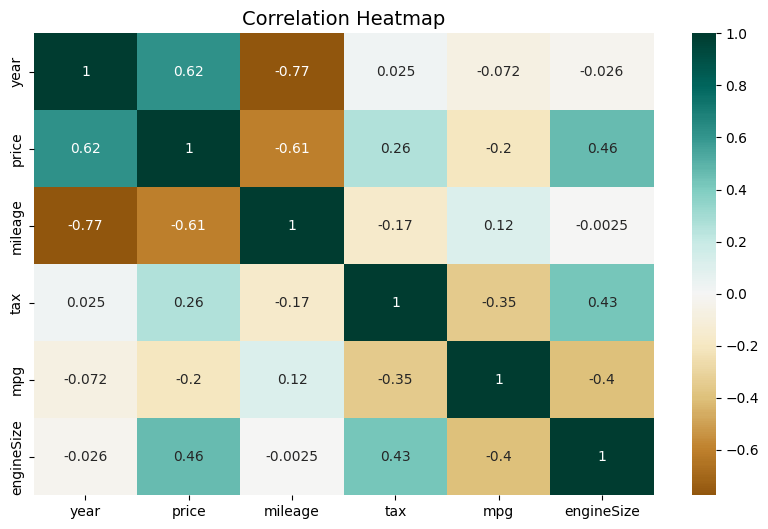

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = bmw.select_dtypes(include=[np.number])
plt.figure(figsize = (10,6))
heatmap = sns.heatmap(numeric_df.corr(), annot=True, cmap='BrBG', center=0)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14})
plt.show()

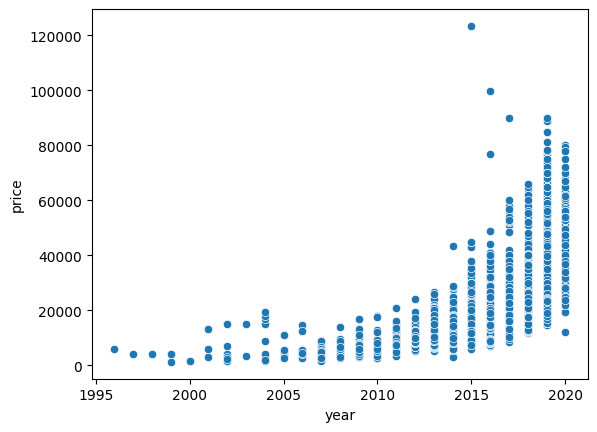

In [8]:
sns.scatterplot(x='year',y='price', data=bmw,)
plt.show()
#

In [7]:
num_model = bmw.groupby('model')['price'].count()
num_model.head(10)
#
#
#

,price
model,
1 Series,1969
2 Series,1229
3 Series,2443
4 Series,995
5 Series,1056
6 Series,108
7 Series,106
8 Series,39
M2,21


In [13]:
value = bmw.groupby('model')['price'].mean()

bmw['model_avg'] = bmw['model'].map(value)

bmw['above_average'] = (bmw['price'] > bmw['model_avg']).map({
    True: 'Above',
    False: 'Below'
})
bmw['above_average']

,above_average
0,Below
1,Above
2,Below
3,Below
4,Below
...,...
10776,Below
10777,Below
10778,Below
10779,Below


In [8]:
expensive_model = num_model * bmw.groupby('model')['price'].mean()
expensive_model.sort_values(ascending=False).head(10)
#

,price
model,
3 Series,48568936.0
1 Series,31152869.0
2 Series,24013888.0
5 Series,23799524.0
4 Series,22385926.0
X5,18556760.0
X1,15932518.0
X3,15294829.0
X2,8204159.0
